# CrowdTruth for Sparse Multiple Choice Tasks: Time Extraction


In [5]:
import pandas as pd
file_name = "all_crowd_time"
test_data = pd.read_csv("../../data/main_crowd_data/raw_data/" + file_name + ".csv")
test_data.head()

,_unit_id,_created_at,_id,_started_at,_tainted,_channel,_trust,_worker_id,_country,_region,...,selectedtags_desc_gold,sentence,sentence_id,stanford_lemma,stanford_lower_lemma,stanford_pos_tag,tagged_events_gold,time_expressions,tokens,all_times
0,2075310336,1/4/2019 21:50:43,4392692769,1/4/2019 21:50:23,False,prodege,1,d8d245c91422aa1ee8390a5faf482603,GBR,C9,...,NaN,The CDC recommends that all children ages 6 mo...,6,the CDC recommend that all child age 6 month a...,the cdc recommend that all child age 6 month a...,DT NNP VBZ IN DT NNS NNS CD NNS CC JJR VB VBN ...,NaN,1,30,"[""6 months__42__50"",""months__44__50"",""each sea..."
1,2075310336,1/4/2019 22:43:12,4392844363,1/4/2019 22:42:40,False,neodev,1,e41850c29bb7b5ccb792c36eb94e6702,USA,NaN,...,NaN,The CDC recommends that all children ages 6 mo...,6,the CDC recommend that all child age 6 month a...,the cdc recommend that all child age 6 month a...,DT NNP VBZ IN DT NNS NNS CD NNS CC JJR VB VBN ...,NaN,1,30,"[""6 months__42__50"",""months__44__50"",""each sea..."
2,2075310336,1/4/2019 23:20:21,4392937356,1/4/2019 23:20:00,False,coinworker,1,7e99298fec7b173dab7013e1543c4eb5,USA,WA,...,NaN,The CDC recommends that all children ages 6 mo...,6,the CDC recommend that all child age 6 month a...,the cdc recommend that all child age 6 month a...,DT NNP VBZ IN DT NNS NNS CD NNS CC JJR VB VBN ...,NaN,1,30,"[""6 months__42__50"",""months__44__50"",""each sea..."
3,2075310336,1/4/2019 23:53:36,4393040534,1/4/2019 23:53:05,False,instagc,1,ef89f2a040ba38c32dc963a69e58ea7d,USA,NJ,...,NaN,The CDC recommends that all children ages 6 mo...,6,the CDC recommend that all child age 6 month a...,the cdc recommend that all child age 6 month a...,DT NNP VBZ IN DT NNS NNS CD NNS CC JJR VB VBN ...,NaN,1,30,"[""6 months__42__50"",""months__44__50"",""each sea..."
4,2075310336,1/5/2019 00:42:45,4393168376,1/5/2019 00:42:13,False,elite,1,e4bc3855f033f3d16c192dcc9fbb25f6,GBR,E4,...,NaN,The CDC recommends that all children ages 6 mo...,6,the CDC recommend that all child age 6 month a...,the cdc recommend that all child age 6 month a...,DT NNP VBZ IN DT NNS NNS CD NNS CC JJR VB VBN ...,NaN,1,30,"[""6 months__42__50"",""months__44__50"",""season__..."


In [6]:
import crowdtruth
from crowdtruth.configuration import DefaultConfig

In [7]:
import logging
import warnings; warnings.simplefilter('ignore')

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)


class TestConfig(DefaultConfig):
    inputColumns = ["doc_id", "total_events_gold", "sentence", "lowercase_sentence", "sentence_id", "all_possible_pgsm_times"]
    outputColumns = ["all_times"]
    
    annotation_separator = ","
        
    # processing of a closed task
    open_ended_task = True
    
    def processJudgments(self, judgments):
        # pre-process output to match the values in annotation_vector
        for col in self.outputColumns:
            # transform to lowercase
            judgments[col] = judgments[col].apply(lambda x: str(x).lower())
            # remove square brackets from annotations
            judgments[col] = judgments[col].apply(lambda x: str(x).replace('[',''))
            judgments[col] = judgments[col].apply(lambda x: str(x).replace(']',''))
            # remove the quotes around the annotations
            judgments[col] = judgments[col].apply(lambda x: str(x).replace('"',''))
        return judgments

## Pre-processing the input data

After declaring the configuration of our input file, we are ready to pre-process the crowd data:

In [8]:
data_open, config = crowdtruth.load(
    file = "../../data/main_crowd_data/raw_data/" + file_name + ".csv",
    config = TestConfig()
)

data_open['judgments'].head()

INFO:root:Config loaded
INFO:root:Values not stored as dictionary


,output.all_times,output.all_times.count,output.all_times.unique,unit,worker,started,submitted,duration,job
judgment,,,,,,,,,
4392692769,"{'6 months__42__50': 1, 'months__44__50': 1, '...",6,6,2075310336,d8d245c91422aa1ee8390a5faf482603,2019-01-04 21:50:23,2019-01-04 21:50:43,20,../../data/main_crowd_data/all_crowd_time
4392844363,"{'6 months__42__50': 1, 'months__44__50': 1, '...",3,3,2075310336,e41850c29bb7b5ccb792c36eb94e6702,2019-01-04 22:42:40,2019-01-04 22:43:12,32,../../data/main_crowd_data/all_crowd_time
4392937356,"{'6 months__42__50': 1, 'months__44__50': 1, '...",4,4,2075310336,7e99298fec7b173dab7013e1543c4eb5,2019-01-04 23:20:00,2019-01-04 23:20:21,21,../../data/main_crowd_data/all_crowd_time
4393040534,"{'6 months__42__50': 1, 'months__44__50': 1, '...",5,5,2075310336,ef89f2a040ba38c32dc963a69e58ea7d,2019-01-04 23:53:05,2019-01-04 23:53:36,31,../../data/main_crowd_data/all_crowd_time
4393168376,"{'6 months__42__50': 1, 'months__44__50': 1, '...",3,3,2075310336,e4bc3855f033f3d16c192dcc9fbb25f6,2019-01-05 00:42:13,2019-01-05 00:42:45,32,../../data/main_crowd_data/all_crowd_time


## Computing the CrowdTruth metrics

The pre-processed data can then be used to calculate the CrowdTruth metrics:

In [9]:
results_open = crowdtruth.run(data_open, config)

INFO:root:1 iterations; max d= 0.7400603907414863 ; wqs d= 0.3689273406855396; uqs d= 0.2554692942396217; aqs d= 0.0
INFO:root:2 iterations; max d= 0.0812605128262166 ; wqs d= 0.04601907596824981; uqs d= 0.02308722775523118; aqs d= 0.0
INFO:root:3 iterations; max d= 0.00898603382419183 ; wqs d= 0.0025087162573978403; uqs d= 0.0019928012110821394; aqs d= 0.0
INFO:root:4 iterations; max d= 0.002119804462982766 ; wqs d= 0.0004988705905578488; uqs d= 0.0005718943645595082; aqs d= 0.0
INFO:root:5 iterations; max d= 0.000296208215600835 ; wqs d= 7.286284052923642e-05; uqs d= 5.393295450169106e-05; aqs d= 0.0


`results` is a dict object that contains the quality metrics for sentences, events and crowd workers.

The **sentence metrics** are stored in `results["units"]`:

In [10]:
results_open["units"].head()

,duration,input.all_possible_pgsm_times,input.doc_id,input.lowercase_sentence,input.sentence,input.sentence_id,job,output.all_times,output.all_times.annotations,output.all_times.unique_annotations,worker,uqs,unit_annotation_score,uqs_initial,unit_annotation_score_initial
unit,,,,,,,,,,,,,,,
2075310336,63.866667,6 months__42__50###months__44__50###each seaso...,AP_20130322,the cdc recommends that all children ages 6 mo...,The CDC recommends that all children ages 6 mo...,6,../../data/main_crowd_data/all_crowd_time,"{'6 months__42__50': 12, 'months__44__50': 12,...",54,9,15,0.667986,"{'6 months__42__50': 0.8517341156522694, 'mont...",0.624695,"{'6 months__42__50': 0.8, 'months__44__50': 0...."
2075310337,60.800000,60 years__87__95###years__90__95###20th Centur...,bbc_20130322_1150,`` he was involved in two of the most importan...,`` He was involved in two of the most importan...,17,../../data/main_crowd_data/all_crowd_time,"{'20th century__68__80': 15, 'century__73__80'...",27,6,15,0.686469,"{'20th century__68__80': 1.0, 'century__73__80...",0.699758,"{'20th century__68__80': 1.0, 'century__73__80..."
2075310338,50.466667,a term__138__144,bbc_20130322_721,a new russian law says foreign-funded non-gove...,A new Russian law says foreign-funded non-gove...,3,../../data/main_crowd_data/all_crowd_time,"{'a term__138__144': 5, 'no_time': 9, 'new__2_...",17,4,15,0.408672,"{'a term__138__144': 0.33931746232705523, 'no_...",0.421358,"{'a term__138__144': 0.3333333333333333, 'no_t..."
2075310339,57.133333,a week__21__27###Summer__56__62###over a week_...,bbc_20130322_1600,this comes just over a week before the start o...,This comes just over a week before the start o...,5,../../data/main_crowd_data/all_crowd_time,"{'a week__21__27': 11, 'summer__56__62': 14, '...",63,14,15,0.648558,"{'a week__21__27': 0.7871314290017316, 'summer...",0.627803,"{'a week__21__27': 0.7333333333333333, 'summer..."
2075310340,61.133333,An hour__0__7,nyt_20130321_women_senate,an hour before her colleagues gathered for the...,An hour before her colleagues gathered for the...,0,../../data/main_crowd_data/all_crowd_time,"{'an hour__0__7': 13, 'hour__3__7': 5, 'before...",26,6,15,0.572408,"{'an hour__0__7': 0.876879949094583, 'hour__3_...",0.568357,"{'an hour__0__7': 0.8666666666666667, 'hour__3..."


The `uqs` column in `results["units"]` contains the **sentence quality scores**, capturing the overall workers agreement over each sentence. Here we plot its histogram:

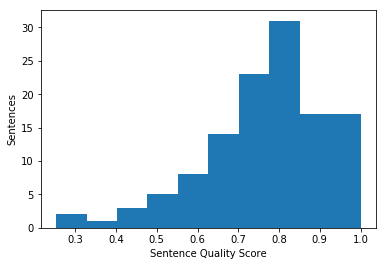

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(results_open["units"]["uqs"])
plt.xlabel("Sentence Quality Score")
plt.ylabel("Sentences")


The `unit_annotation_score` column in `results["units"]` contains the **sentence-relation scores**, capturing the likelihood that a relation is expressed in a sentence. For each sentence, we store a dictionary mapping each relation to its sentence-relation score.

In [12]:
results_open["units"]["unit_annotation_score"].head(10)

unit
2075310336    {'6 months__42__50': 0.8517341156522694, 'mont...
2075310337    {'20th century__68__80': 1.0, 'century__73__80...
2075310338    {'a term__138__144': 0.33931746232705523, 'no_...
2075310339    {'a week__21__27': 0.7871314290017316, 'summer...
2075310340    {'an hour__0__7': 0.876879949094583, 'hour__3_...
2075310341    {'annually__177__185': 1.0, 'the first time__4...
2075310342    {'april 7__69__76': 1.0, 'four-week__2__11': 1...
2075310343    {'at the time__117__128': 0.8920067086367262, ...
2075310344    {'august__23__29': 1.0, 'july__106__110': 1.0,...
2075310345    {'august__51__57': 1.0, 'in august__48__57': 0...
Name: unit_annotation_score, dtype: object

The **worker metrics** are stored in `results["workers"]`:

In [13]:
results_open["workers"].head()

,unit,judgment,job,duration,wqs,wwa,wsa,wqs_initial,wwa_initial,wsa_initial
worker,,,,,,,,,,
03ac1eaa176026ece65c610ac8780a6e,20,20,1,73.850000,0.647882,0.756258,0.856695,0.590014,0.708485,0.832784
0a3302e56f7d6a1edc99700f53076e2d,71,71,1,41.563380,0.517269,0.689317,0.750407,0.463107,0.643264,0.719933
0b095ebfd3609700ad47be07a8a0a9b1,100,100,1,39.200000,0.798095,0.845546,0.943881,0.749167,0.807405,0.927870
1797ee0c41662f6da99122f038c45c66,94,94,1,45.595745,0.781444,0.838937,0.931470,0.724040,0.797264,0.908156
1ffcb4b845f71b6e949a4786ea4e376f,5,5,1,72.600000,0.802166,0.840520,0.954369,0.770785,0.813419,0.947587


The `wqs` columns in `results["workers"]` contains the **worker quality scores**, capturing the overall agreement between one worker and all the other workers.

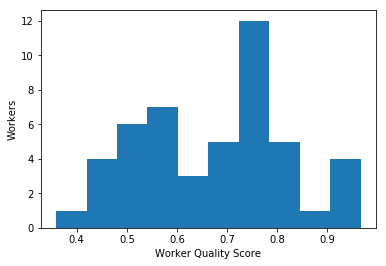

In [14]:
plt.hist(results_open["workers"]["wqs"])
plt.xlabel("Worker Quality Score")
plt.ylabel("Workers")

In [15]:
print(results_open["units"].iloc[0])

duration                                                                         63.8667
input.all_possible_pgsm_times          6 months__42__50###months__44__50###each seaso...
input.doc_id                                                                 AP_20130322
input.lowercase_sentence               the cdc recommends that all children ages 6 mo...
input.sentence                         The CDC recommends that all children ages 6 mo...
input.sentence_id                                                                      6
job                                            ../../data/main_crowd_data/all_crowd_time
output.all_times                       {'6 months__42__50': 12, 'months__44__50': 12,...
output.all_times.annotations                                                          54
output.all_times.unique_annotations                                                    9
worker                                                                                15
uqs                  

## Save crowd results in a csv file

In [17]:
rows = []
header = list(results_open["units"])
header.extend(["validated_time", "no_of_annotations", "validated_time_final_score", "validated_time_initial_score"])

rows.append(header)

for i in range(len(results_open["units"].index)):
    keys = []

    all_event_runs = results_open["units"]["input.all_possible_pgsm_times"].iloc[i].lower().split("###")
    keys.extend(all_event_runs)
    keys.append("no_time")
    
    for crowd_event in results_open["units"]["output.all_times"].iloc[i]:
        crowd_event = crowd_event.replace("###", ",")
        crowd_event = crowd_event.replace("---", "''")
        crowd_event = crowd_event.replace("|||", "'")
        if crowd_event not in keys:
            keys.append(crowd_event)
    
    for j in range(len(keys)):
        row = list(results_open["units"].iloc[i])
        row.append(keys[j])
        row.append(results_open["units"]["output.all_times"].iloc[i][keys[j].lower()])
        row.append(results_open["units"]["unit_annotation_score"].iloc[i][keys[j].lower()])
        row.append(results_open["units"]["unit_annotation_score_initial"].iloc[i][keys[j].lower()])
    
        rows.append(row)
        
        
import csv

with open('../../data/main_crowd_data/results/' + file_name + '_units_open.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(rows)

## Comparison with Expert Annotations

In [19]:
# expert annotations in TempEval-3 Platinum dataset
import numpy as np
           
expert_platinum_data = pd.read_csv("../../data/TempEval3-data/TE3-Platinum_time.csv")
crowd_data = pd.read_csv("../../data/main_crowd_data/results/" + file_name + "_units_open.csv")
crowd_data["Experts"] = 0

for i in range(len(crowd_data.index)):
    
    subset = expert_platinum_data[(expert_platinum_data["Doc Id"].str.lower() == crowd_data["input.doc_id"].iloc[i].lower()) & (expert_platinum_data["Sentence Id"] == crowd_data["input.sentence_id"].iloc[i])]# & (str(str(expert_data["Lowercase Token"]) + "__" + str(expert_data["Start Offset"]) + "__" + str(expert_data["End Offset"])) == str(crowd_data["validated_event"].iloc[i]))]
    found = False
    for j in range(len(subset.index)):
        if str(str(subset["Lowercase Token"].iloc[j]) + "__" + str(subset["Start Offset"].iloc[j]) + "__" + str(subset["End Offset"].iloc[j])) == crowd_data["validated_time"].iloc[i]:
            found = True
    if found == True:
        crowd_data["Experts"].iloc[i] = 1
    else:
        crowd_data["Experts"].iloc[i] = 0
crowd_data.to_csv("../../data/main_crowd_data/results/" + file_name + "_units_open.csv", index=False)    


In [23]:
import eval_crowd_results as eval_script

crowd = pd.read_csv('../../data/main_crowd_data/results/' + file_name + '_units_open.csv')
eval_file = eval_script.compute_crowd_performance(crowd, "validated_time_final_score")
     
with open('../../data/main_crowd_data/results/eval_' + file_name + '_units_open.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(eval_file)
    
eval_main = pd.read_csv("../../data/main_crowd_data/results/eval_" + file_name + "_units_open.csv")
eval_main

,Thresh,TP,TN,FP,FN,Precision,Recall,Accuracy,F1-score
0,0.05,137,225,448,1,0.234188,0.992754,0.446363,0.378976
1,0.10,137,400,273,1,0.334146,0.992754,0.662145,0.500000
2,0.15,137,450,223,1,0.380556,0.992754,0.723798,0.550201
3,0.20,137,477,196,1,0.411411,0.992754,0.757090,0.581741
4,0.25,137,503,170,1,0.446254,0.992754,0.789149,0.615730
5,0.30,136,517,156,2,0.465753,0.985507,0.805179,0.632558
6,0.35,136,532,141,2,0.490975,0.985507,0.823674,0.655422
7,0.40,136,541,132,2,0.507463,0.985507,0.834772,0.669951
8,0.45,134,545,128,4,0.511450,0.971014,0.837238,0.670000
9,0.50,133,552,121,5,0.523622,0.963768,0.844636,0.678571
